import sys
import os

sys.path.clear()
sys.path.append("D:/Anaconda/envs/mask-tutorial/python.exe")

sys.path

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os 
import sys

In [2]:
parent_dir = os.getcwd()
print(parent_dir)
sys.path.append(parent_dir)

D:\CV\Object tracking and Image Segmentation\Mask_RCNN-TF2


In [3]:
from mrcnn import utils
import mrcnn.model as models

In [4]:
parent_dir

'D:\\CV\\Object tracking and Image Segmentation\\Mask_RCNN-TF2'

In [5]:
os.path.join(parent_dir, "samples/coco/")

'D:\\CV\\Object tracking and Image Segmentation\\Mask_RCNN-TF2\\samples/coco/'

In [6]:
sys.path.append(os.path.join(parent_dir, "samples/coco/"))

In [7]:
import coco

In [8]:
os.path

<module 'ntpath' from 'D:\\Anaconda\\envs\\mask-tutorial\\lib\\ntpath.py'>

In [9]:
sys.path

['D:\\CV\\Object tracking and Image Segmentation\\Mask_RCNN-TF2',
 'D:\\Anaconda\\envs\\mask-tutorial\\python37.zip',
 'D:\\Anaconda\\envs\\mask-tutorial\\DLLs',
 'D:\\Anaconda\\envs\\mask-tutorial\\lib',
 'D:\\Anaconda\\envs\\mask-tutorial',
 '',
 'D:\\Anaconda\\envs\\mask-tutorial\\lib\\site-packages',
 'D:\\Anaconda\\envs\\mask-tutorial\\lib\\site-packages\\win32',
 'D:\\Anaconda\\envs\\mask-tutorial\\lib\\site-packages\\win32\\lib',
 'D:\\Anaconda\\envs\\mask-tutorial\\lib\\site-packages\\Pythonwin',
 'D:\\Anaconda\\envs\\mask-tutorial\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ANT-PC\\.ipython',
 'D:\\CV\\Object tracking and Image Segmentation\\Mask_RCNN-TF2',
 'D:\\CV\\Object tracking and Image Segmentation\\Mask_RCNN-TF2\\samples/coco/',
 'D:\\CV']

In [10]:
model_log_dir = os.path.join(parent_dir, "logs")

pre_trained_model_path = os.path.join(parent_dir, "mask_rcnn_coco.h5")

detection_imgs_dir = os.path.join(parent_dir, "images")

## Configurations:

Model we are using is pre-trained on MS-COCO dataset. 
CocoConfig contains the configurations

In [11]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create model and object in inference mode

In [37]:
model = models.MaskRCNN(
    mode="inference",
    config = config,
    model_dir = model_log_dir
)

model.load_weights(pre_trained_model_path, by_name=True)

## Class Names

In [38]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush', 'auto']

In [39]:
%matplotlib inline

In [40]:
import skimage

In [41]:
file_name = "blr_traffic.png"
image = skimage.io.imread(os.path.join(parent_dir, file_name))

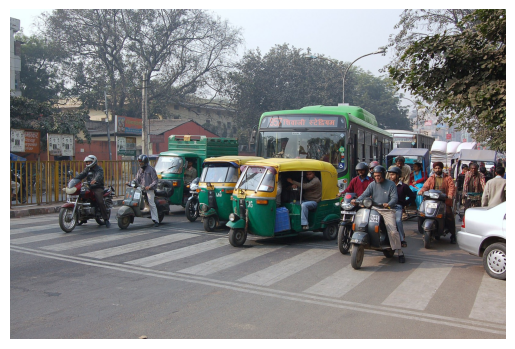

In [42]:
plt.imshow(image)
plt.axis(False);

In [43]:
from mrcnn import visualize

Processing 1 images
image                    shape: (1080, 1624, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1624.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


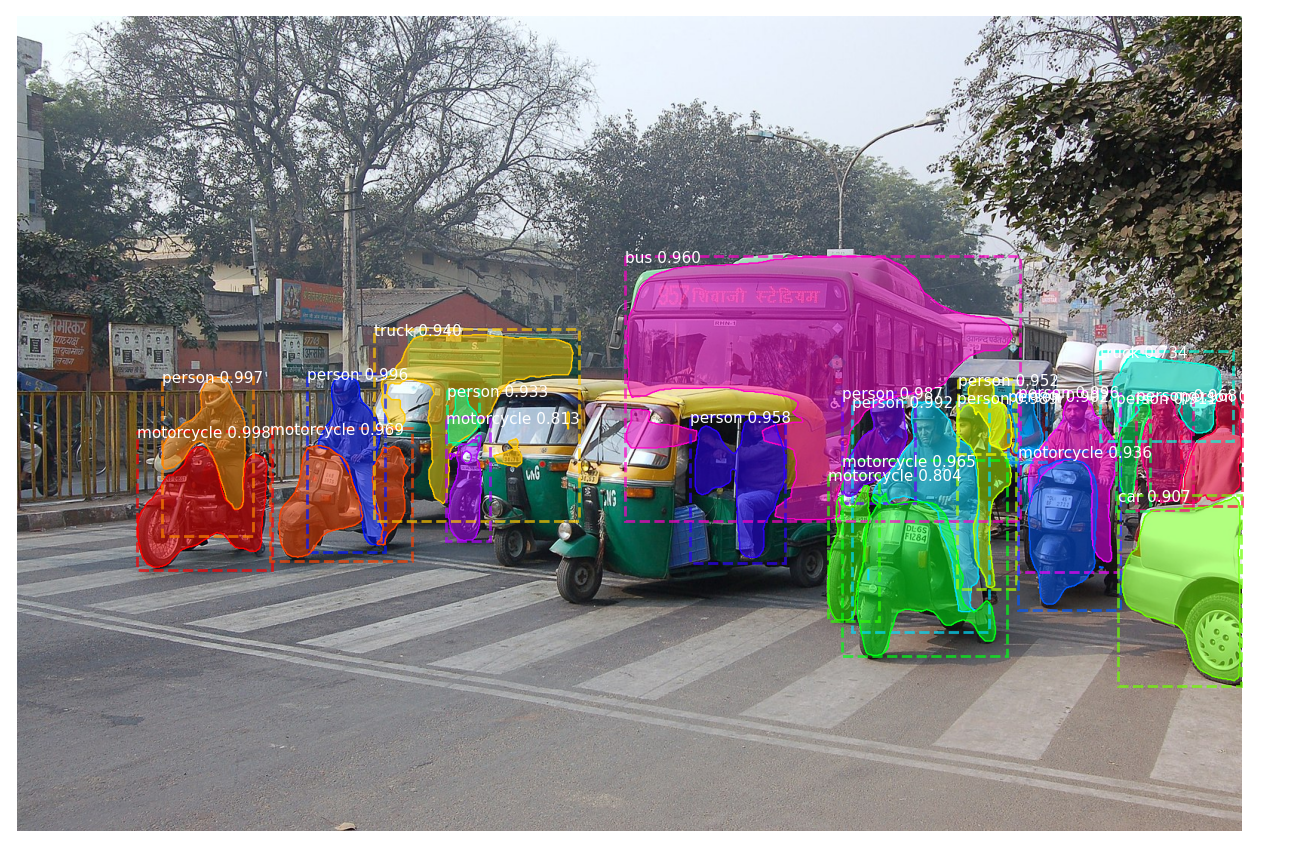

In [44]:
# Run detections
result = model.detect([image], verbose=1)

# Visualize results
r = result[0]
visualize.display_instances(image,
                           r['rois'],
                           r['masks'],
                           r['class_ids'],
                           class_names, 
                           r['scores'])

## Observations:

* We can see that `model` is able to detect and classify classes precent within the cocoset really well. 
* In this setting the Model isnt able to understand Autos and this is because Autos do-not exist in the `MS-COCO dataset`. 


In [45]:
model.config.LEARNING_RATE

0.001

In [46]:
model.

TypeError: find_trainable_layer() missing 1 required positional argument: 'layer'